<a href="https://colab.research.google.com/github/sidrasultana41/completed_multi_plant_notebook/blob/main/completed_multi_plant_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib notebook
import os
import argparse
import matplotlib
import numpy as np

from plantcv import plantcv as pcv

In [ ]:
class options:
    def __init__(self):
        self.image = "./imgs/10.9.1.29_pos-153-001-003_2019-10-26-19-05.jpg"
        self.debug = "plot"
        self.writeimg = False
        self.result = "data_output"
        self.outdir = "img_output"
args = options()
pcv.params.debug_outdir = args.outdir
pcv.params.debug = args.debug

<IPython.core.display.Javascript object>


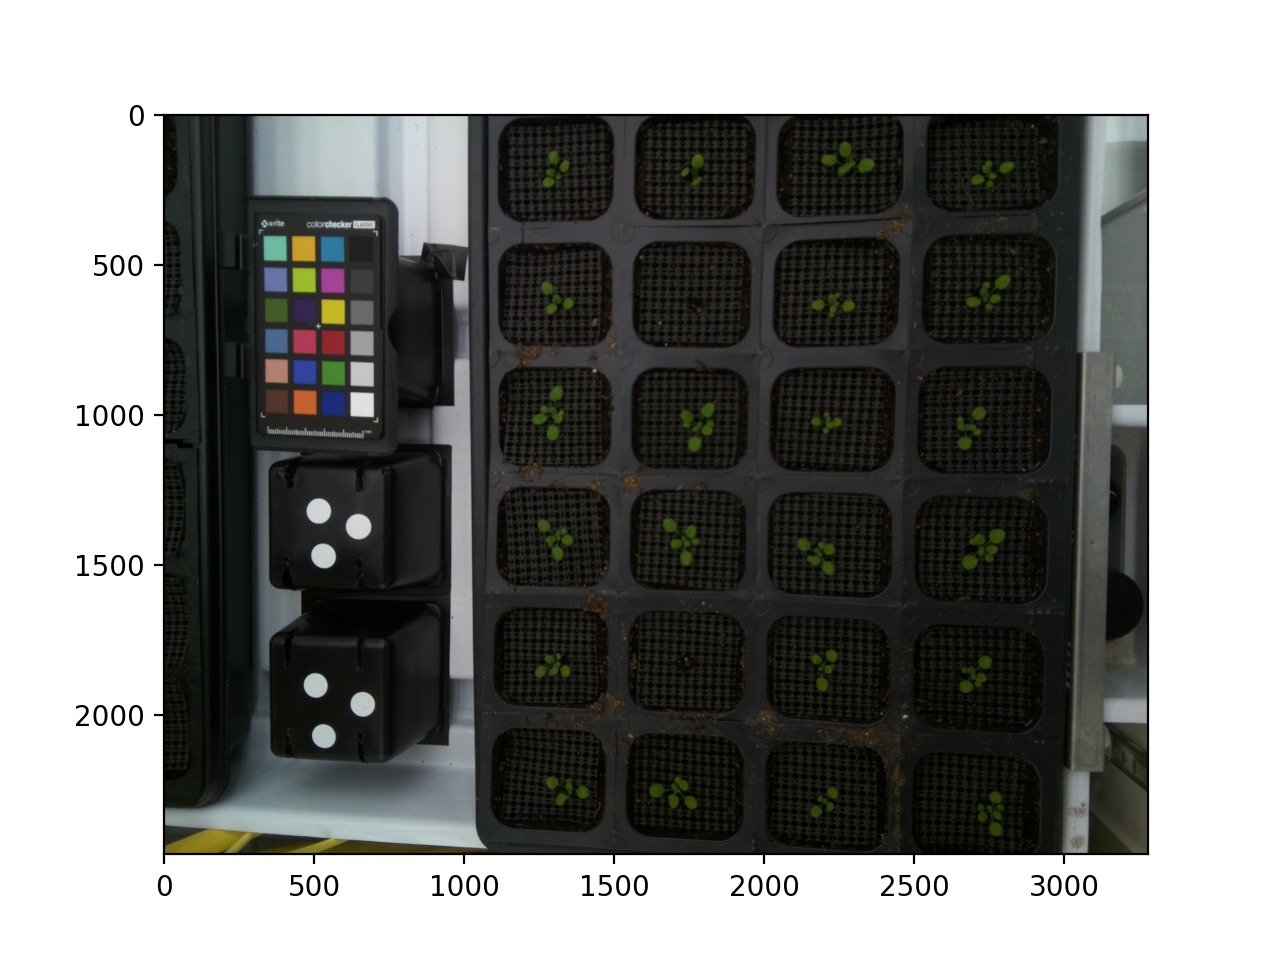

In [ ]:
img, path, filename = pcv.readimage(filename=args.image)


<IPython.core.display.Javascript object>


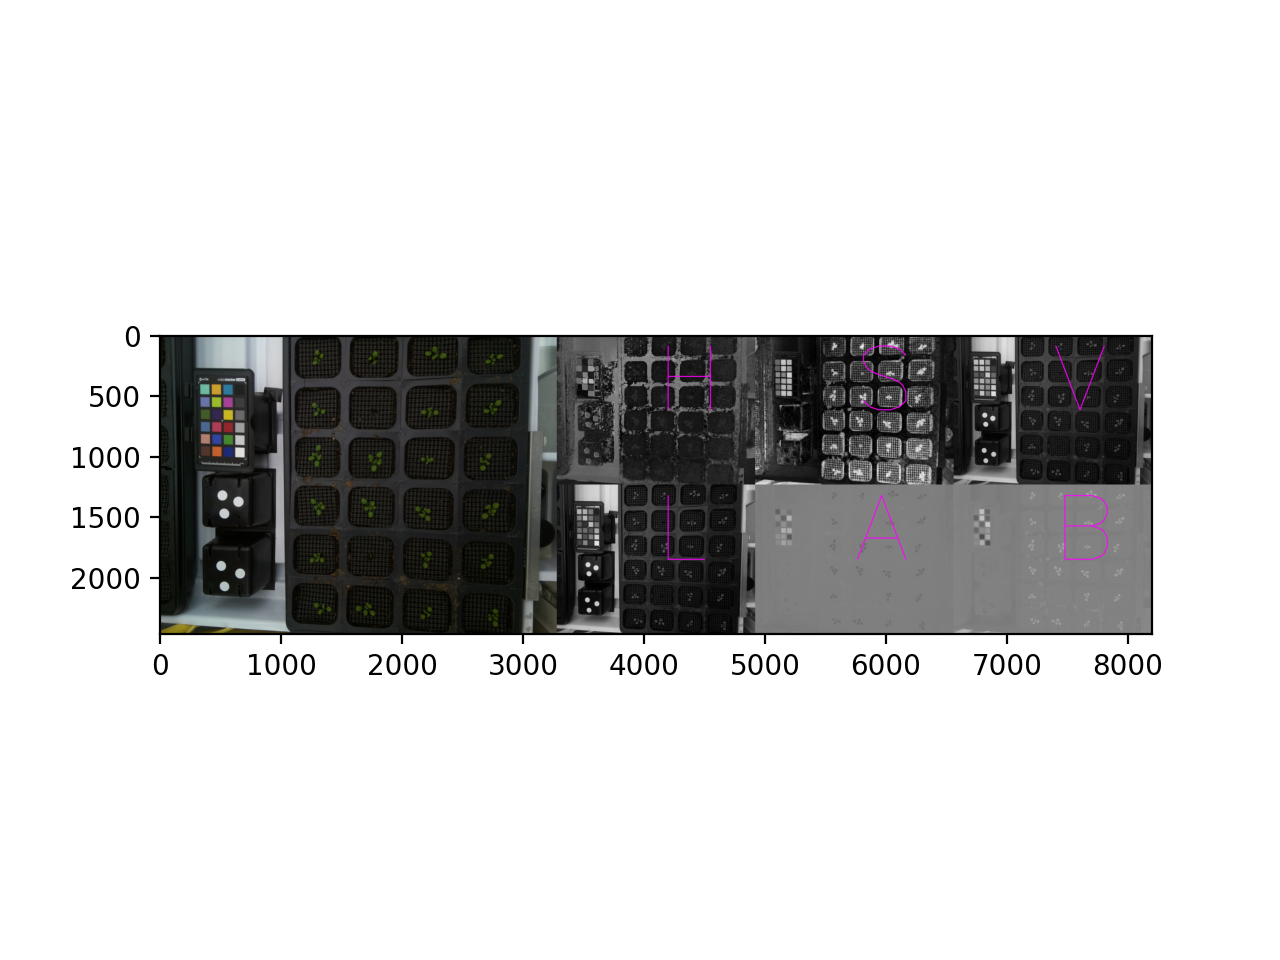

In [ ]:
# Update params related to plotting so we can see better
pcv.params.text_size=50
pcv.params.text_thickness=15

colorspace_img = pcv.visualize.colorspaces(rgb_img=img)


<IPython.core.display.Javascript object>


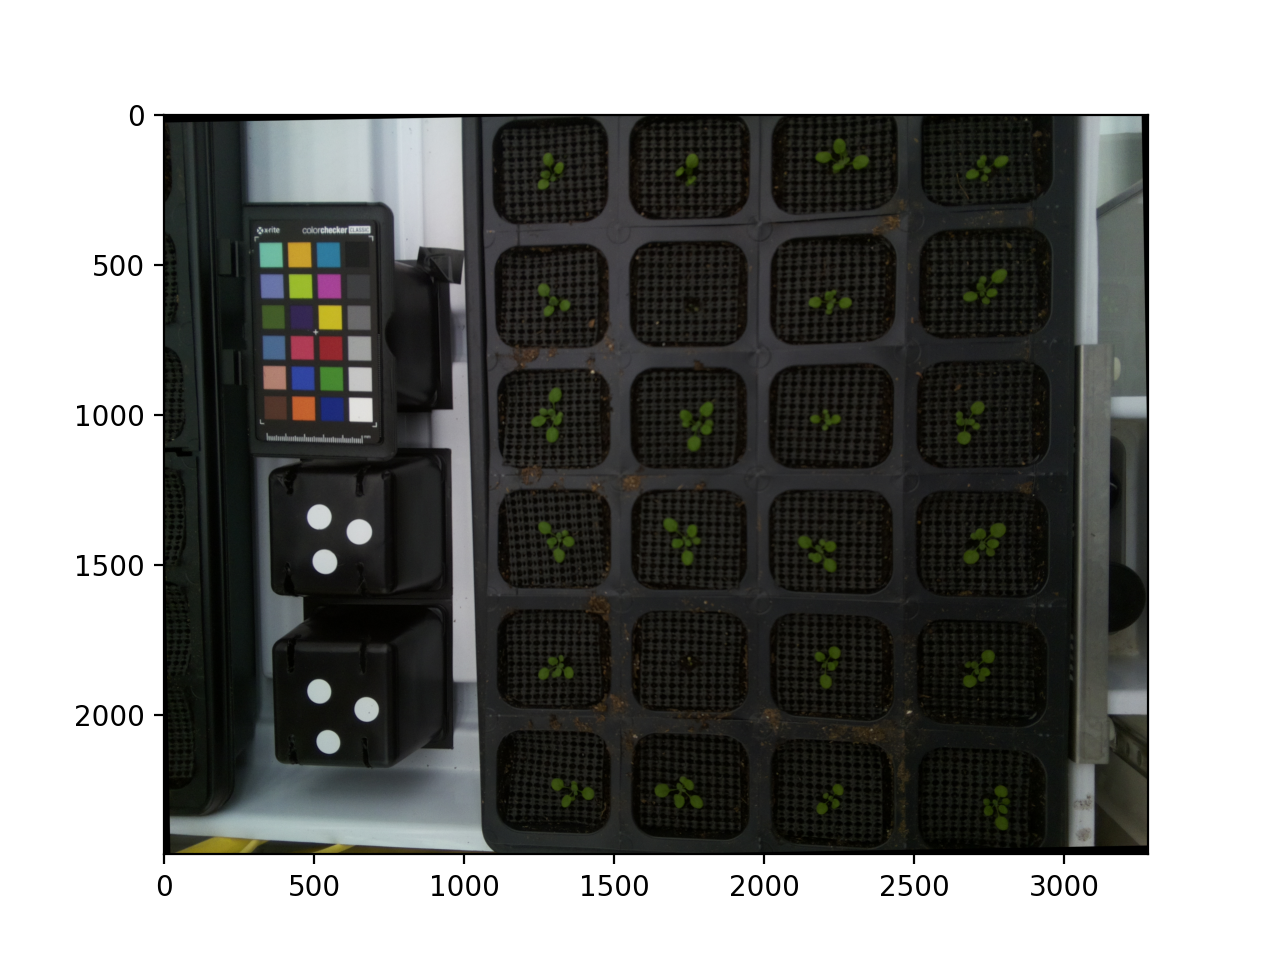

In [ ]:
rot_img = pcv.rotate(img=img, rotation_deg=1, crop=True)

<IPython.core.display.Javascript object>


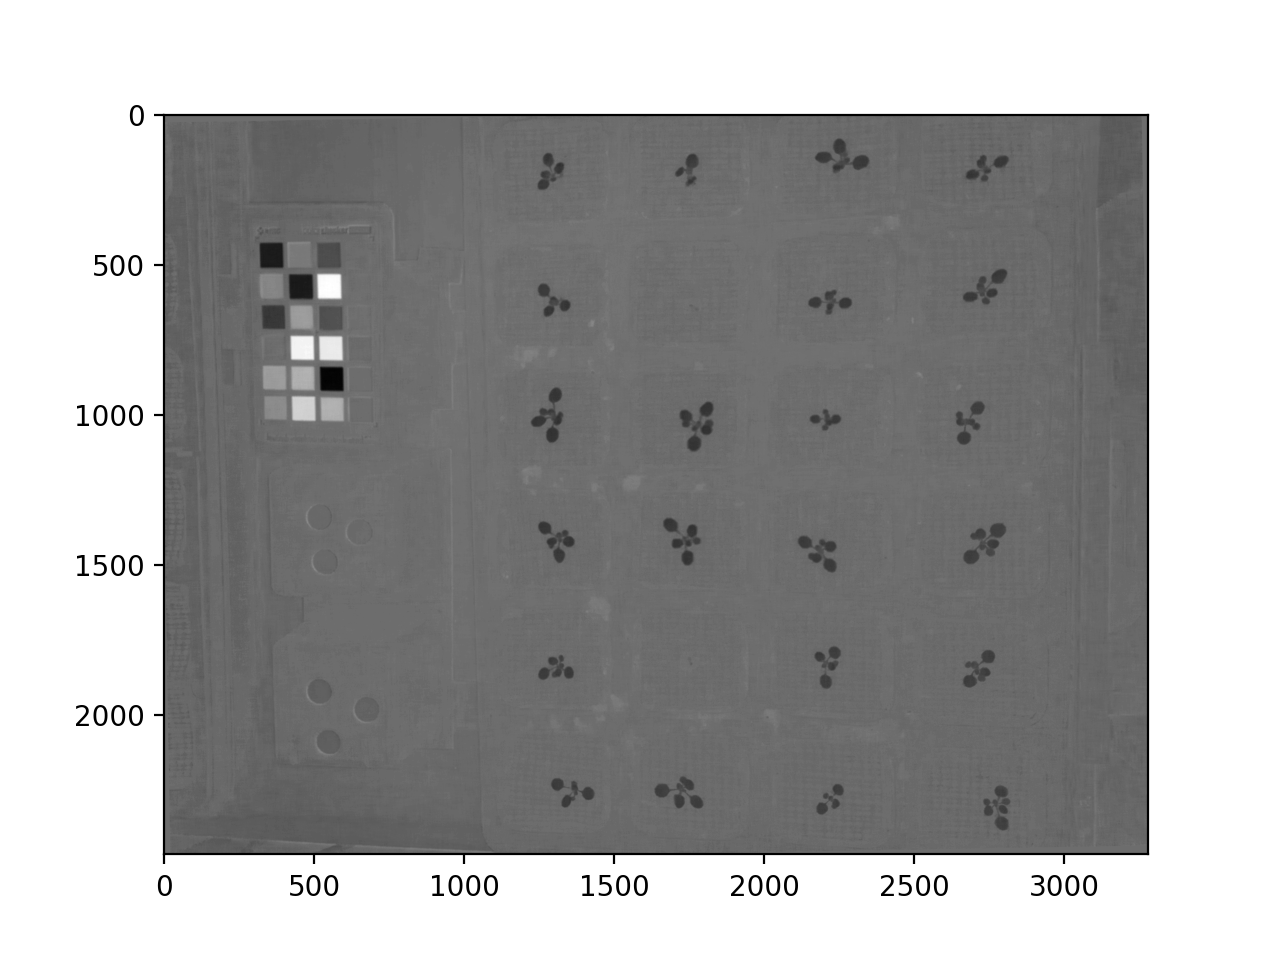

In [ ]:
#### Create a mask and begin to clean it ####
# Change color space for plant extraction
a = pcv.rgb2gray_lab(rgb_img=rot_img, channel="a")


<IPython.core.display.Javascript object>


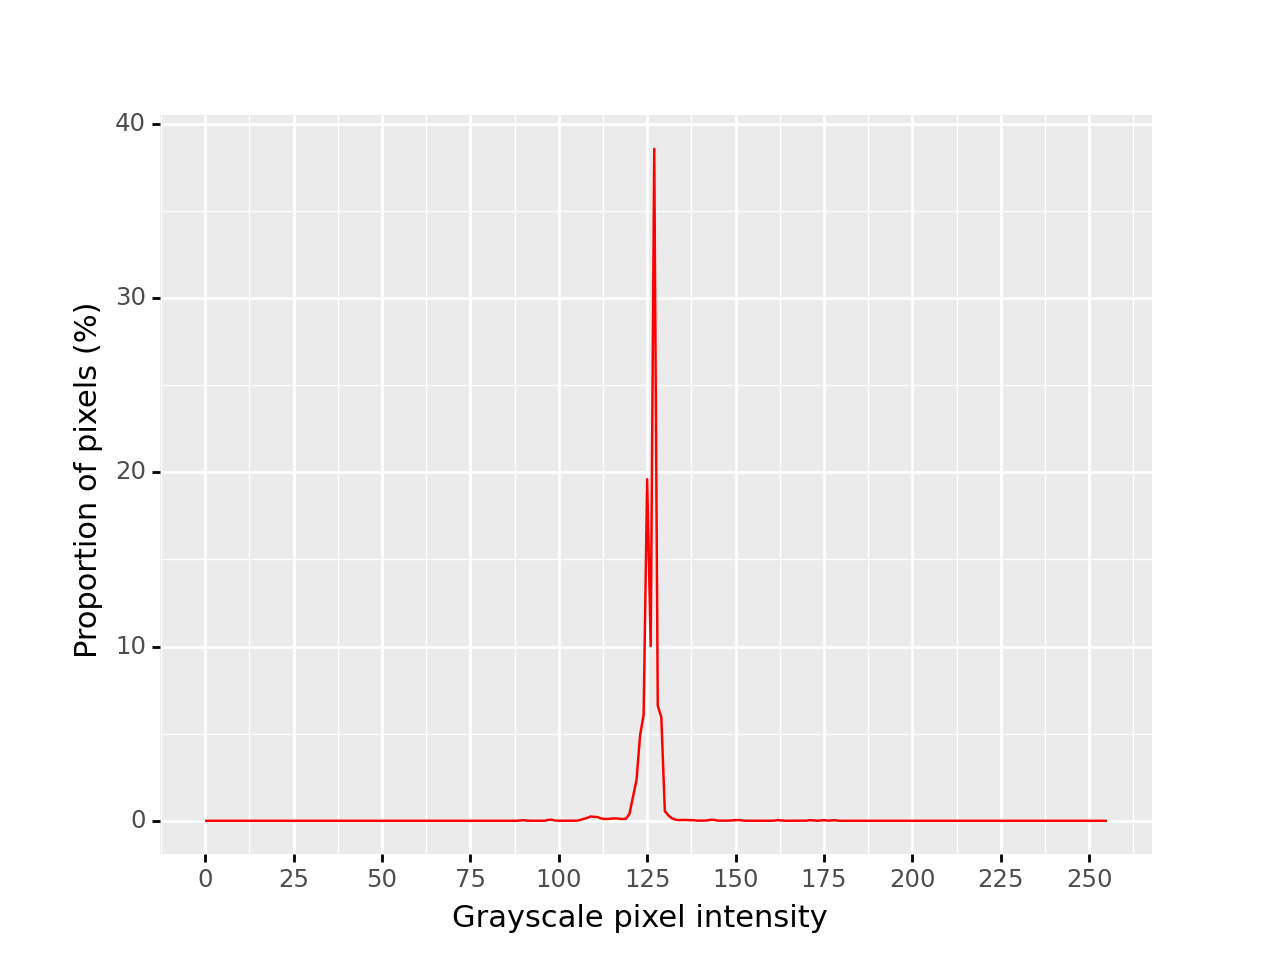

<ggplot: (8734189737693)>


In [ ]:
hist = pcv.visualize.histogram(gray_img=a)

<IPython.core.display.Javascript object>


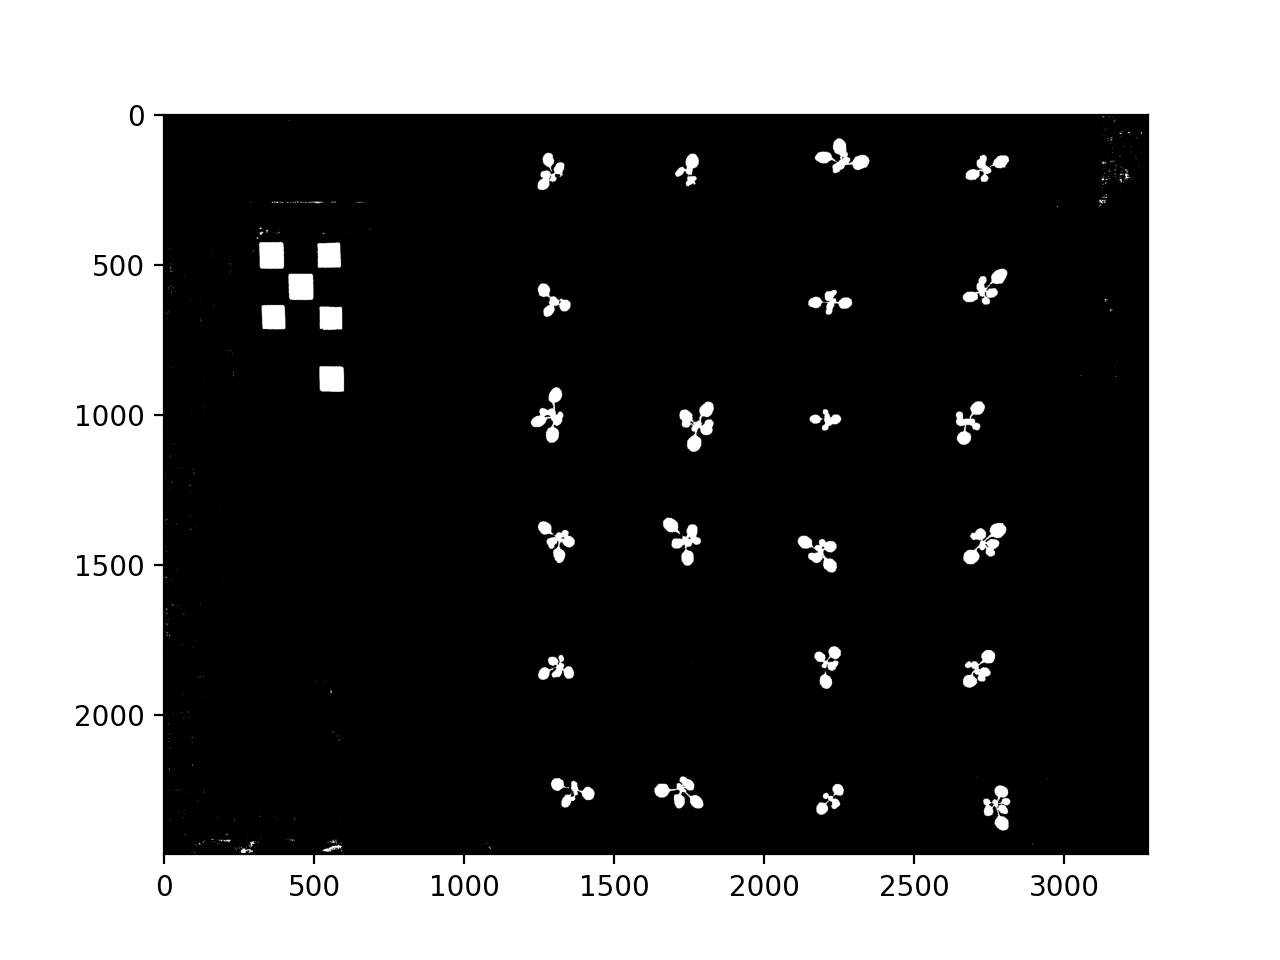

In [ ]:
# Threshold
a_thresh = pcv.threshold.binary(gray_img=a, threshold=120, max_value=255, object_type='dark')


<IPython.core.display.Javascript object>


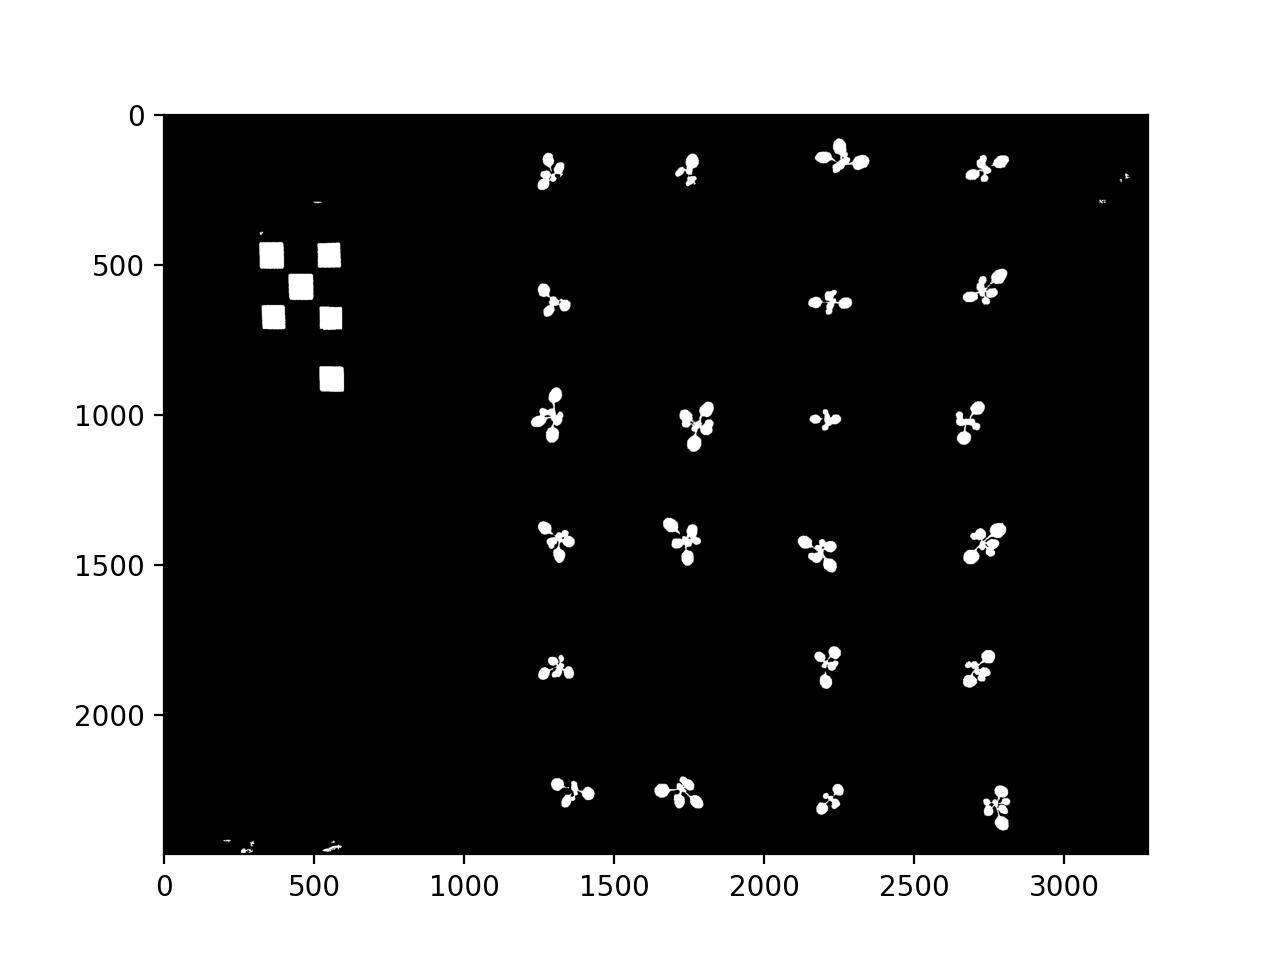

In [ ]:
# Fill in small objects
a_fill_image = pcv.fill(bin_img=a_thresh, size=50)


<IPython.core.display.Javascript object>


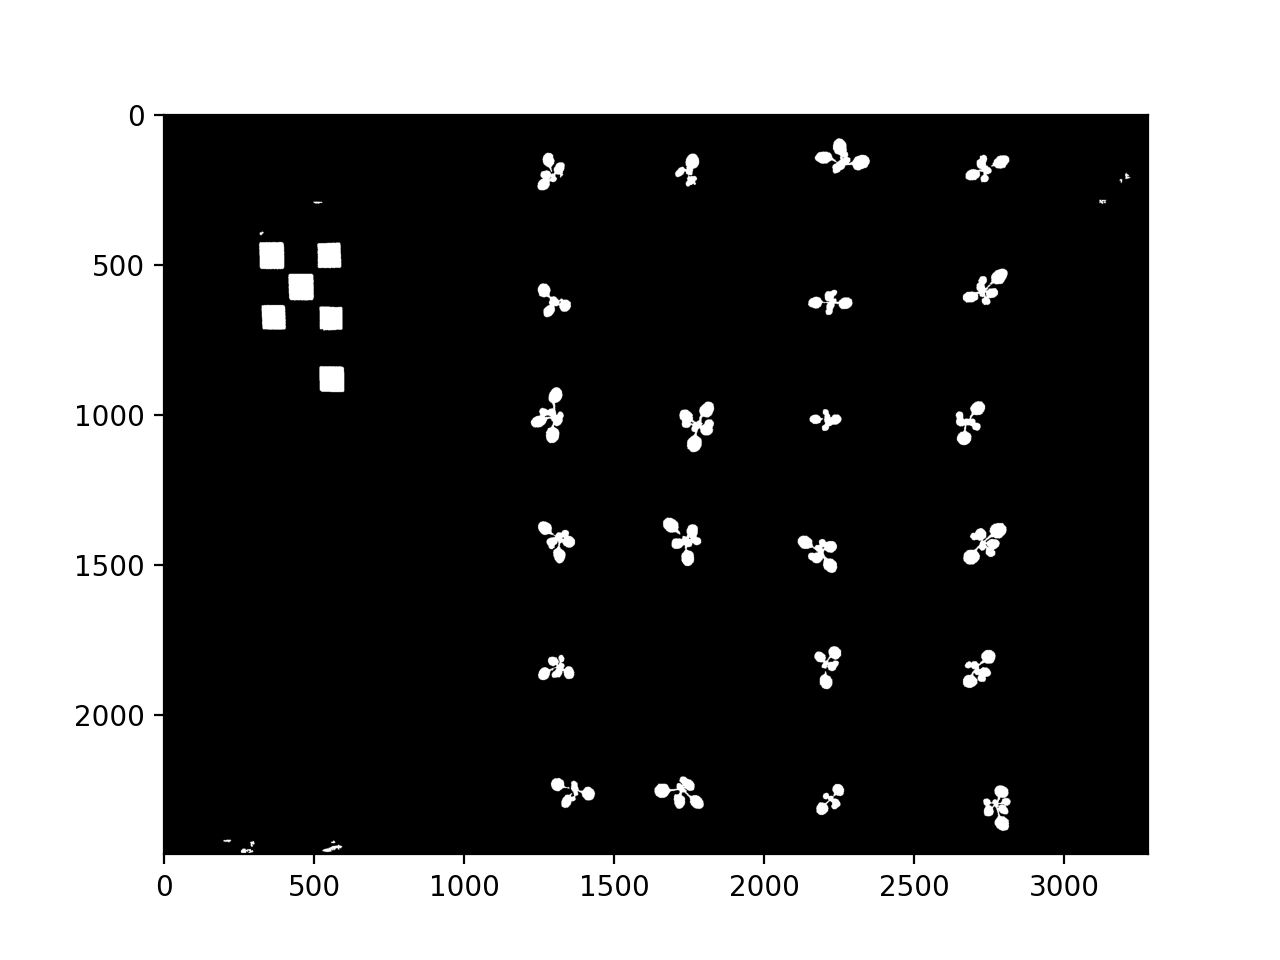

In [ ]:
# Dilate
a_dilated = pcv.dilate(gray_img=a_fill_image, ksize=2, i=1)

<IPython.core.display.Javascript object>


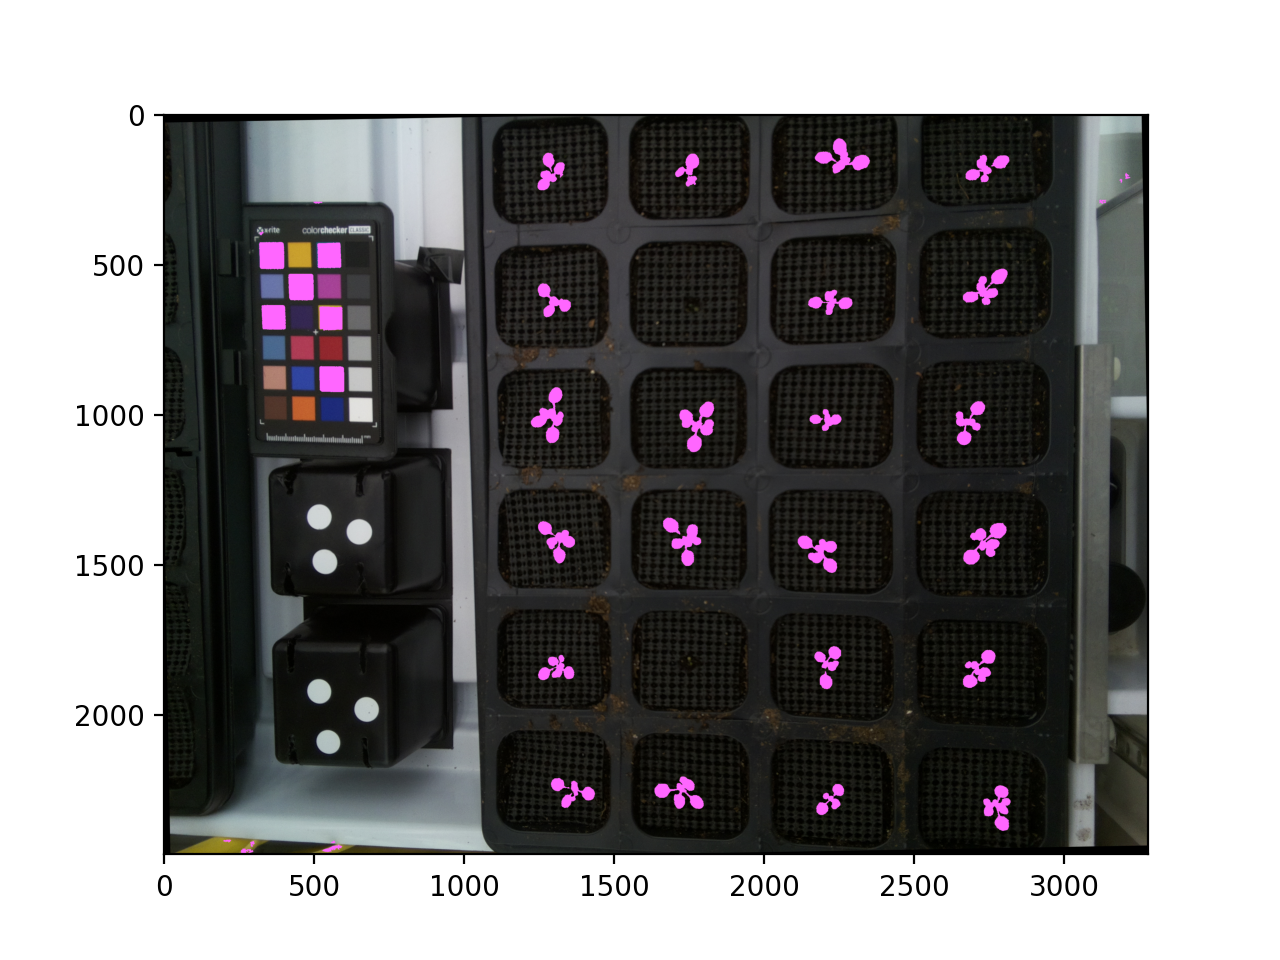

In [ ]:
obj, obj_hierarchy = pcv.find_objects(img=rot_img, mask=a_dilated)

<IPython.core.display.Javascript object>


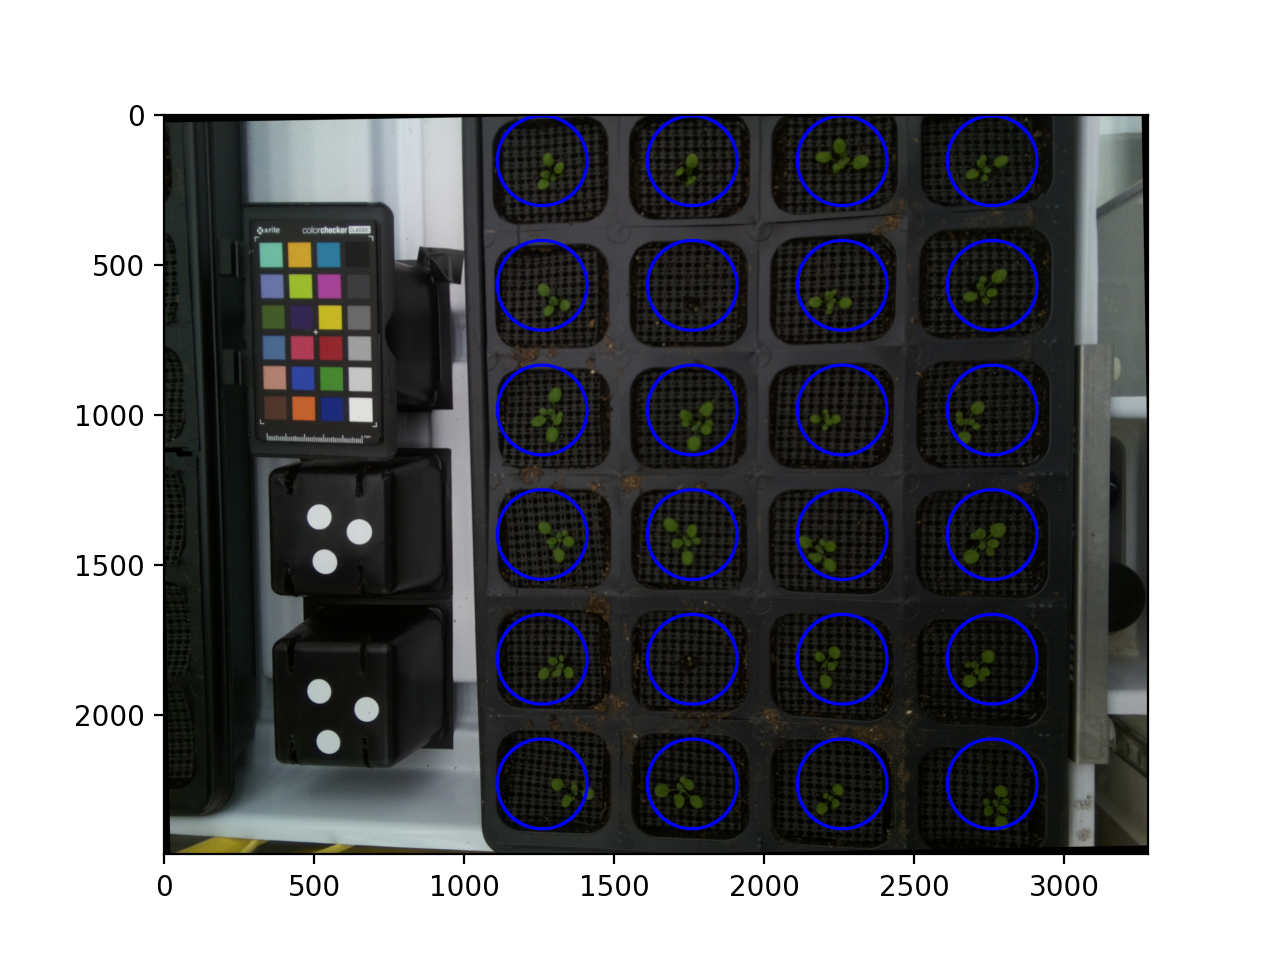

In [ ]:
# Create a grid of ROIs
pcv.params.line_thickness = 10
rois1, roi_hierarchy1 = pcv.roi.multi(img=rot_img, coord=(1260, 155), radius=150,
                                      spacing=(500, 415), nrows=6, ncols=4)

In [ ]:
plant_id = range(0,len(rois1))

In [ ]:
img_copy = np.copy(rot_img)
pcv.params.debug = None
for i in range(0, len(rois1)):
    roi = rois1[i]
    hierarchy = roi_hierarchy1[i]
    id_label = plant_id[i]
    # Find objects
    filtered_contours, filtered_hierarchy, filtered_mask, filtered_area = pcv.roi_objects(
        img=rot_img, roi_type="partial", roi_contour=roi, roi_hierarchy=hierarchy, object_contour=obj,
        obj_hierarchy=obj_hierarchy)

    if filtered_area > 0:
        # Combine objects together in each plant
        plant_contour, plant_mask = pcv.object_composition(img=rot_img, contours=filtered_contours, hierarchy=filtered_hierarchy)
        # Analyze the shape of each plant
        img_copy = pcv.analyze_object(img=img_copy, obj=plant_contour, mask=plant_mask, label=id_label)

pcv.plot_image(img_copy)
pcv.print_image(img_copy, os.path.join(args.outdir, filename + "_shapes.jpg")



In [ ]:
img_copy = np.copy(rot_img)
pcv.params.debug = None
for i in range(0, len(rois1)):
    roi = rois1[i]
    hierarchy = roi_hierarchy1[i]
    id_label = plant_id[i]
    # Find objects
    filtered_contours, filtered_hierarchy, filtered_mask, filtered_area = pcv.roi_objects(
        img=rot_img, roi_type="partial", roi_contour=roi, roi_hierarchy=hierarchy, object_contour=obj,
        obj_hierarchy=obj_hierarchy)

    if filtered_area > 0:
        # Combine objects together in each plant
        plant_contour, plant_mask = pcv.object_composition(img=rot_img, contours=filtered_contours, hierarchy=filtered_hierarchy)
        # Analyze the shape of each plant
        img_copy = pcv.analyze_object(img=img_copy, obj=plant_contour, mask=plant_mask, label=id_label)

pcv.plot_image(img_copy)
pcv.print_image(img_copy, os.path.join(args.outdir, filename + "_shapes.jpg")



In [ ]:
pcv.print_results(filename=args.result)

NameError: name 'pcv' is not defined